ASSIGNMENT-3

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

1.	DATA PREPROCESSING: 
Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

In [52]:
data = pd.read_csv("E:\# IIT (BHU) VARANASI\ML in Python (SimuTech-IITK)\Data-Melbourne_F.csv")
print(data.head())

   avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  


In [53]:
data.describe()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,29.184009,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,31.366315,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,0.000000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,0.000000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,57.600000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,107.600000,2019.000000,12.000000,31.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
 17  year         1382 non-null   int64  
 18  month        1382 non-null   int64  
 19  day   

In [55]:
#Handling missing values

data.isnull().sum()

avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64

In [56]:
#Scaling

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
data[numerical_cols] = scaled_df

print(data.head())

   avg_outflow  avg_inflow  total_grid        Am       BOD       COD  \
0    -0.805651   -1.332352   -2.225310 -1.575285 -0.198473 -0.797725   
1    -0.809721   -1.073851   -2.096054 -1.833057 -0.140310 -0.728932   
2    -0.816234   -0.890398   -1.639084  0.358007  0.418058 -0.068521   
3    -0.816234   -0.800756   -1.515138 -0.415310  0.557650  0.027789   
4    -0.825189   -0.495001   -1.620977  0.873551  1.464997  1.169751   

         TN         T        TM        Tm       SLP         H        PP  \
0 -0.661883  0.790009  0.644062  0.550494 -0.060258 -0.520245  0.996525   
1 -0.760490  0.382340  0.432622  0.486050 -0.060258 -0.038448 -0.166933   
2  0.498985  0.326749  0.940079 -0.265797 -0.060258 -1.139698  0.024425   
3  0.072624 -0.080920 -0.088932  0.228274 -0.060258 -1.002042 -0.166933   
4  0.798166 -0.303284 -0.201700 -0.437647 -0.060258  0.099208 -0.166933   

        VV         V        VM        VG      year     month       day  
0  0.05506  1.039669  1.558983  1.604722 -1

In [57]:
#Feature Selection

variance_threshold = VarianceThreshold(threshold=0.1)  
low_variance_data = variance_threshold.fit_transform(data[numerical_cols])
selected_features_variance = numerical_cols[variance_threshold.get_support()]
low_variance_df = pd.DataFrame(low_variance_data, columns=selected_features_variance)
correlation_matrix = low_variance_df.corr().abs()

# Identifying highly correlated features (correlation > 0.85)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Finding columns with high correlation
high_correlation_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)
]

# Removing highly correlated features
final_selected_features = low_variance_df.drop(columns=high_correlation_features)

print(f"Selected features after variance and correlation filtering: {final_selected_features.columns.tolist()}")


Selected features after variance and correlation filtering: ['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN', 'T', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year', 'month', 'day']


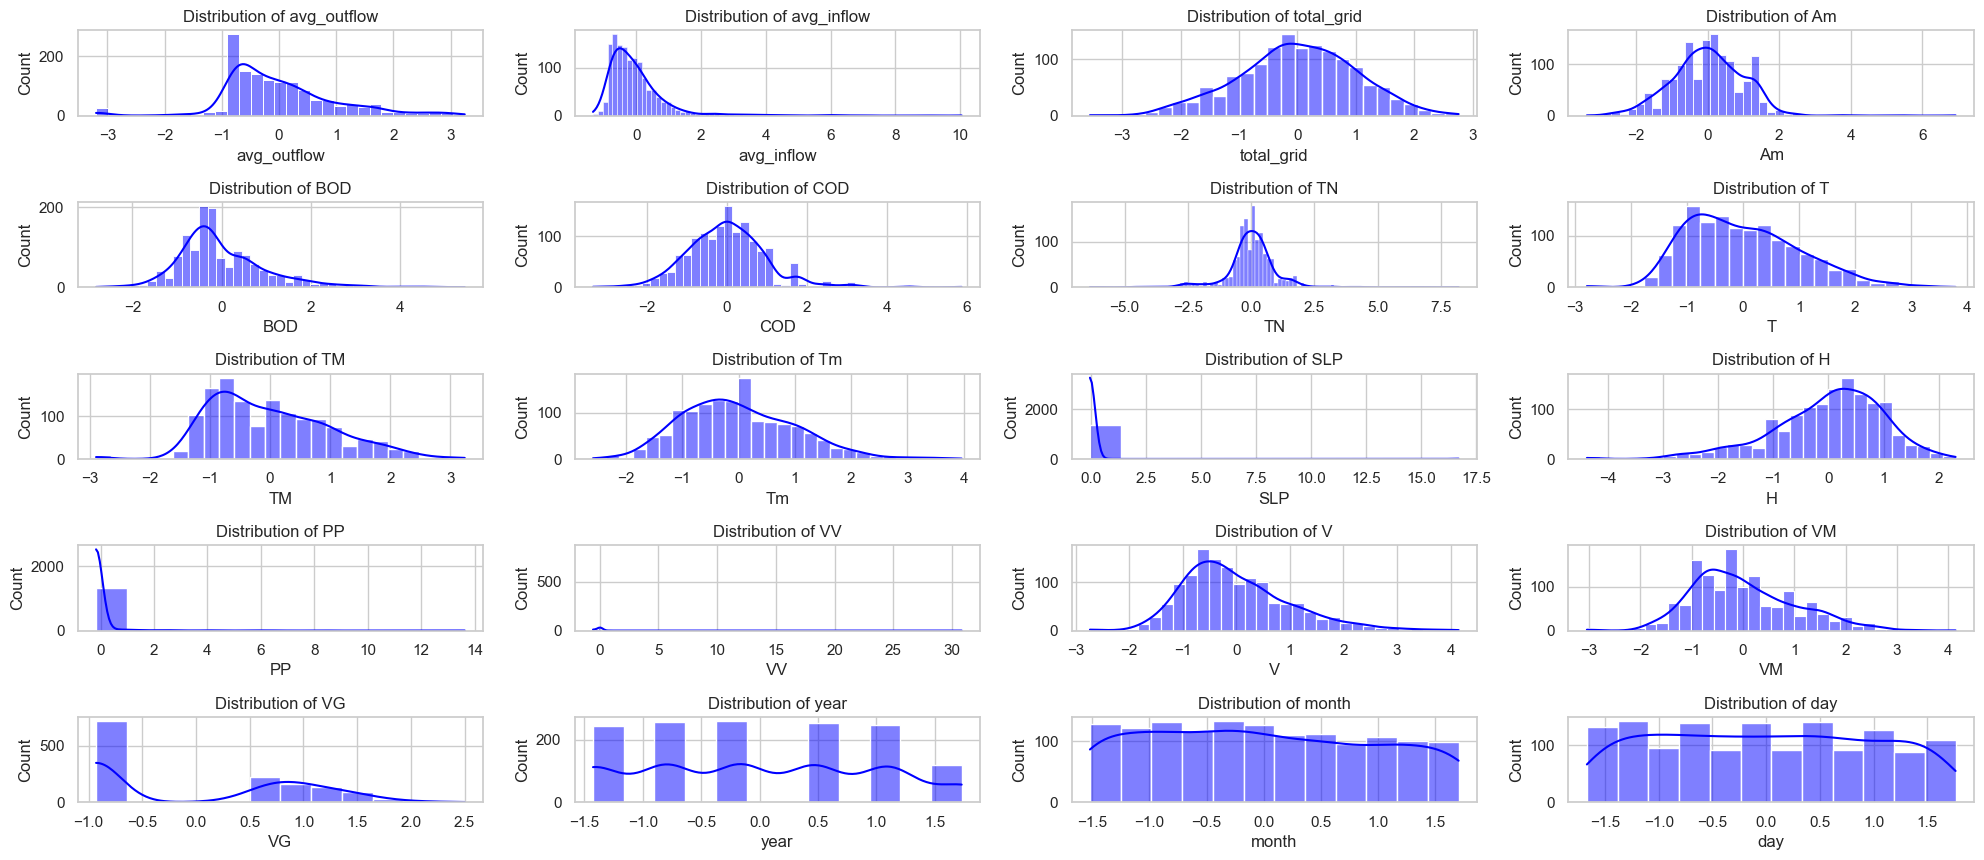

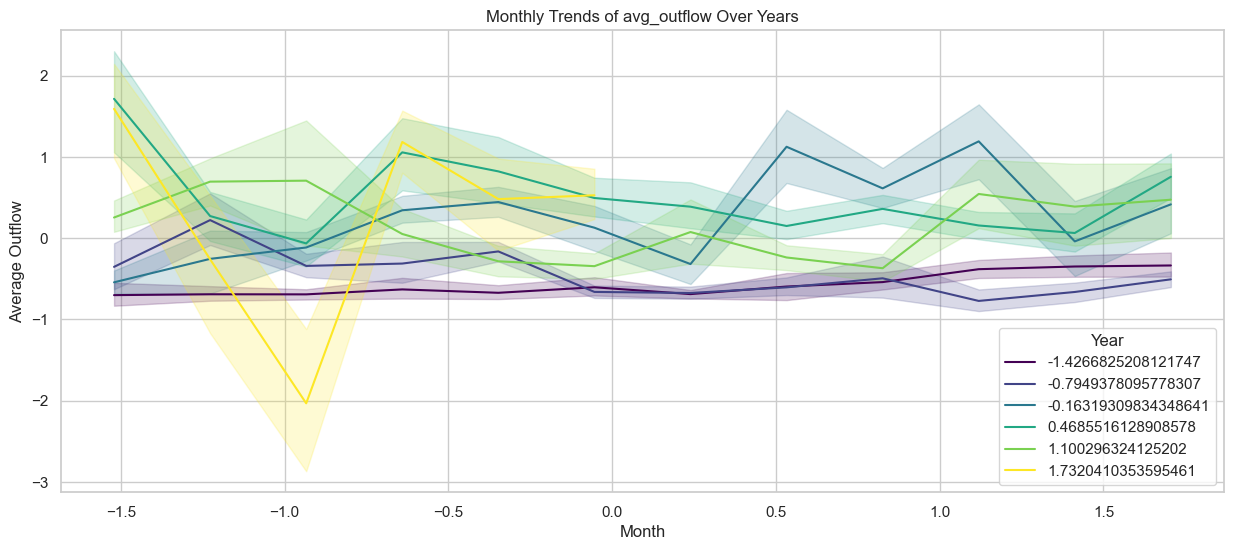

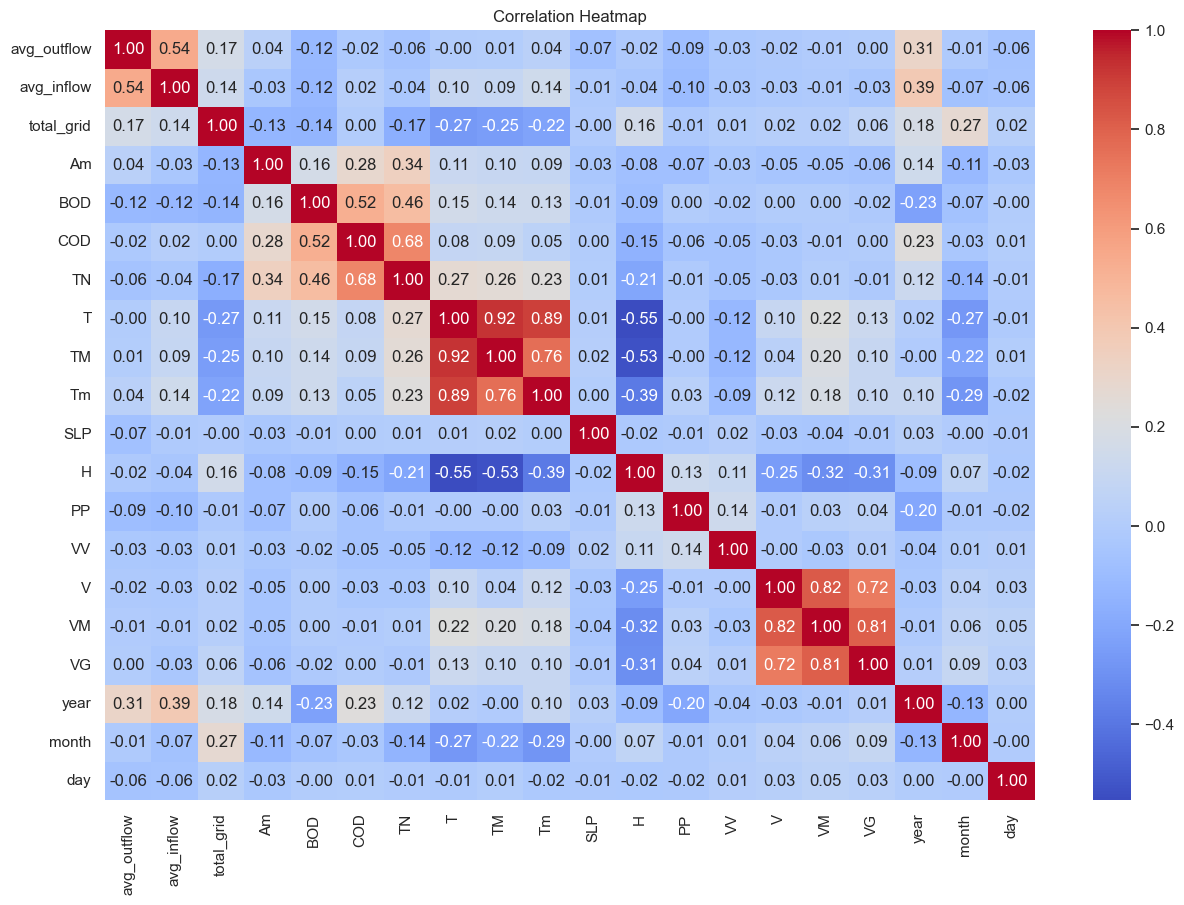

In [58]:
# Visualizing key trends for a selected feature over time

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Distribution of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 4) + 1, 4, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Time-series trends (if applicable)
if {'year', 'month', 'day'}.issubset(data.columns):
    # Visualize avg_outflow trends over time
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=data, x='month', y='avg_outflow', hue='year', palette='viridis')
    plt.title("Monthly Trends of avg_outflow Over Years")
    plt.xlabel("Month")
    plt.ylabel("Average Outflow")
    plt.legend(title="Year")
    plt.show()

#  Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()



2.	MODELING WITH ML ALGORITHMS:
Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:
o	Logistic Regression from scratch as well as from sklearn
o	K-Nearest Neighbours (KNN)
o	Decision Tree Classifier
o	Random Forest Classifier
o	Support Vector Machine (SVM)
o	Any other relevant algorithms you feel might improve performance.

In [59]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop('COD', axis=1)  
Y = data['COD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [60]:
# Defining threshold for classification
threshold = Y.mean()
Y_train_class = (Y_train > threshold).astype(int)
Y_test_class = (Y_test > threshold).astype(int)

print("Mean Threshold:", threshold)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train_class sample:\n", Y_train_class.head())
print("Y_test_class sample:\n", Y_test_class.head())

Mean Threshold: 4.935752723080291e-16
X_train shape: (1105, 19)
X_test shape: (277, 19)
Y_train_class sample:
 415     1
371     1
716     0
1089    0
1107    1
Name: COD, dtype: int64
Y_test_class sample:
 309    1
741    1
265    1
823    1
778    1
Name: COD, dtype: int64


In [61]:
#Logistic Regression (from scratch)

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            error = predictions - Y
            self.theta -= self.learning_rate * (1 / self.m) * np.dot(X.T, error)
    
    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))

log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, Y_train_class)
Y_pred_scratch = log_reg_scratch.predict(X_test)

In [62]:
# Logistic regression (from sklearn) 

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, Y_train_class)
Y_pred_sklearn = log_reg_sklearn.predict(X_test)

In [63]:
# K Nearest Neighbour (KNN) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train_class)
Y_pred_knn = knn.predict(X_test)

In [64]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train_class)
Y_pred_dt = dt.predict(X_test)

In [65]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train_class)
Y_pred_rf = rf.predict(X_test)

In [66]:
# Support Vector Machine

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train_class)
Y_pred_svm = svm.predict(X_test)

In [67]:
# Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

evaluate_model(Y_test_class, Y_pred_scratch, "Logistic Regression (Scratch)")
evaluate_model(Y_test_class, Y_pred_sklearn, "Logistic Regression (sklearn)")
evaluate_model(Y_test_class, Y_pred_knn, "KNN")
evaluate_model(Y_test_class, Y_pred_dt, "Decision Tree")
evaluate_model(Y_test_class, Y_pred_rf, "Random Forest")
evaluate_model(Y_test_class, Y_pred_svm, "SVM")

Logistic Regression (Scratch) - Accuracy: 0.7798, F1-Score: 0.7889
Confusion Matrix:
[[102  35]
 [ 26 114]]

Logistic Regression (sklearn) - Accuracy: 0.8267, F1-Score: 0.8310
Confusion Matrix:
[[111  26]
 [ 22 118]]

KNN - Accuracy: 0.7329, F1-Score: 0.7218
Confusion Matrix:
[[107  30]
 [ 44  96]]

Decision Tree - Accuracy: 0.8520, F1-Score: 0.8453
Confusion Matrix:
[[124  13]
 [ 28 112]]

Random Forest - Accuracy: 0.8917, F1-Score: 0.8951
Confusion Matrix:
[[119  18]
 [ 12 128]]

SVM - Accuracy: 0.8664, F1-Score: 0.8763
Confusion Matrix:
[[109  28]
 [  9 131]]



In [69]:
# Random Forest Hyperparameter Tuning

param_grid = { 
    'n_estimators': [ 100, 200], 
    'max_depth':[10,20,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2] 
} 

grid_search_rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_search_rf.fit(X_train,Y_train_class)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
Y_pred_rf_tuned = best_rf.predict(X_test)
evaluate_model(Y_test_class, Y_pred_rf_tuned, "Random Forest (Tuned)")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (Tuned) - Accuracy: 0.8664, F1-Score: 0.8729
Confusion Matrix:
[[113  24]
 [ 13 127]]

